In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
data= pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/data_eu_cleaned_tokenized.csv")

In [6]:
data 

,content,place,year,month,content_token
0,going multiple reports co2 emissions seeing cu...,eu,2022,August,"['going', 'multiple', 'reports', 'co2', 'emiss..."
1,last year didnt get fall weather late november...,eu,2022,August,"['last', 'year', 'didnt', 'get', 'fall', 'weat..."
2,shouldnt,eu,2022,August,['shouldnt']
3,yess season name pre schedule guess got discou...,eu,2022,August,"['yess', 'season', 'name', 'pre', 'schedule', ..."
4,twitters doomers waste days telling inevitabil...,eu,2022,August,"['twitters', 'doomers', 'waste', 'days', 'tell..."
...,...,...,...,...,...
45199,wasnt fault mps expenses claims aswell porn,eu,2010,July,"['wasnt', 'fault', 'mps', 'expenses', 'claims'..."
45200,recordheat prove,eu,2010,July,"['recordheat', 'prove']"
45201,every problem universe comes builtin solution ...,eu,2010,July,"['every', 'problem', 'universe', 'comes', 'bui..."
45202,watching mayan prophecy movie im convinced not...,eu,2010,May,"['watching', 'mayan', 'prophecy', 'movie', 'im..."


In [7]:
data.dropna(inplace = True)

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [9]:
data['negative'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['neg'])
data['neutral'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['neu'])
data['positive'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['pos'])
data['compound'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['compound'])
data

,content,place,year,month,content_token,negative,neutral,positive,compound
0,going multiple reports co2 emissions seeing cu...,eu,2022,August,"['going', 'multiple', 'reports', 'co2', 'emiss...",0.088,0.730,0.182,0.2748
1,last year didnt get fall weather late november...,eu,2022,August,"['last', 'year', 'didnt', 'get', 'fall', 'weat...",0.270,0.730,0.000,-0.5719
2,shouldnt,eu,2022,August,['shouldnt'],0.000,1.000,0.000,0.0000
3,yess season name pre schedule guess got discou...,eu,2022,August,"['yess', 'season', 'name', 'pre', 'schedule', ...",0.000,0.724,0.276,0.4939
4,twitters doomers waste days telling inevitabil...,eu,2022,August,"['twitters', 'doomers', 'waste', 'days', 'tell...",0.111,0.672,0.217,0.4019
...,...,...,...,...,...,...,...,...,...
45199,wasnt fault mps expenses claims aswell porn,eu,2010,July,"['wasnt', 'fault', 'mps', 'expenses', 'claims'...",0.000,0.727,0.273,0.3089
45200,recordheat prove,eu,2010,July,"['recordheat', 'prove']",0.000,1.000,0.000,0.0000
45201,every problem universe comes builtin solution ...,eu,2010,July,"['every', 'problem', 'universe', 'comes', 'bui...",0.302,0.391,0.307,-0.2263
45202,watching mayan prophecy movie im convinced not...,eu,2010,May,"['watching', 'mayan', 'prophecy', 'movie', 'im...",0.000,0.769,0.231,0.4019


In [10]:
data['content'][20]

'running water parts mississippi capital hits treatment plant'

In [11]:
print(sid.polarity_scores("china highlights economic damage wrought warmingrecord heatwave behind power shortages paralysed industry probably caused scientists"))

{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5859}


In [12]:
data['comp_score'] = data['compound'].apply(lambda c: 'positive' if c > 0.3 else ('negative' if c< -0.3 else 'neutral'))

data.head() 

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,going multiple reports co2 emissions seeing cu...,eu,2022,August,"['going', 'multiple', 'reports', 'co2', 'emiss...",0.088,0.730,0.182,0.2748,neutral
1,last year didnt get fall weather late november...,eu,2022,August,"['last', 'year', 'didnt', 'get', 'fall', 'weat...",0.270,0.730,0.000,-0.5719,negative
2,shouldnt,eu,2022,August,['shouldnt'],0.000,1.000,0.000,0.0000,neutral
3,yess season name pre schedule guess got discou...,eu,2022,August,"['yess', 'season', 'name', 'pre', 'schedule', ...",0.000,0.724,0.276,0.4939,positive
4,twitters doomers waste days telling inevitabil...,eu,2022,August,"['twitters', 'doomers', 'waste', 'days', 'tell...",0.111,0.672,0.217,0.4019,positive


In [13]:
data.to_csv("sentiments_eu.csv", index =False)

In [14]:
data['comp_score'].value_counts()

neutral     21710
positive    11632
negative    11040
Name: comp_score, dtype: int64

In [15]:
data

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,going multiple reports co2 emissions seeing cu...,eu,2022,August,"['going', 'multiple', 'reports', 'co2', 'emiss...",0.088,0.730,0.182,0.2748,neutral
1,last year didnt get fall weather late november...,eu,2022,August,"['last', 'year', 'didnt', 'get', 'fall', 'weat...",0.270,0.730,0.000,-0.5719,negative
2,shouldnt,eu,2022,August,['shouldnt'],0.000,1.000,0.000,0.0000,neutral
3,yess season name pre schedule guess got discou...,eu,2022,August,"['yess', 'season', 'name', 'pre', 'schedule', ...",0.000,0.724,0.276,0.4939,positive
4,twitters doomers waste days telling inevitabil...,eu,2022,August,"['twitters', 'doomers', 'waste', 'days', 'tell...",0.111,0.672,0.217,0.4019,positive
...,...,...,...,...,...,...,...,...,...,...
45199,wasnt fault mps expenses claims aswell porn,eu,2010,July,"['wasnt', 'fault', 'mps', 'expenses', 'claims'...",0.000,0.727,0.273,0.3089,positive
45200,recordheat prove,eu,2010,July,"['recordheat', 'prove']",0.000,1.000,0.000,0.0000,neutral
45201,every problem universe comes builtin solution ...,eu,2010,July,"['every', 'problem', 'universe', 'comes', 'bui...",0.302,0.391,0.307,-0.2263,neutral
45202,watching mayan prophecy movie im convinced not...,eu,2010,May,"['watching', 'mayan', 'prophecy', 'movie', 'im...",0.000,0.769,0.231,0.4019,positive


In [16]:
sentiments = pd.DataFrame(data['comp_score'].value_counts()).reset_index()
sentiments.columns =['sentiment', 'no._of_people']

In [17]:
sentiments

,sentiment,no._of_people
0,neutral,21710
1,positive,11632
2,negative,11040


<AxesSubplot:xlabel='sentiment', ylabel='no._of_people'>

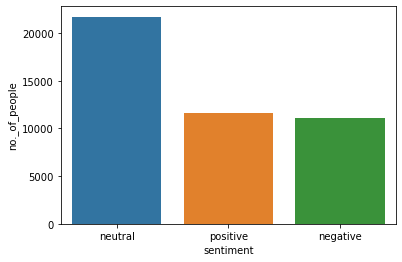

In [18]:
sns.barplot(x='sentiment', y = 'no._of_people', data =sentiments)

In [142]:
s=pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/sentiments.csv")

In [143]:
s

,Text,Like Count,Text_token,negative,neutral,positive,compound,comp_score
0,climate change scam steal tax money milankovic...,0,"['climate', 'change', 'scam', 'steal', 'tax', ...",0.610,0.325,0.065,-0.9246,negative
1,existing excess carbon dioxide atmosphere lead...,0,"['existing', 'excess', 'carbon', 'dioxide', 'a...",0.136,0.680,0.184,0.0516,neutral
2,2021 report intergovernmental panel droughts i...,5,"['2021', 'report', 'intergovernmental', 'panel...",0.168,0.710,0.123,-0.1779,neutral
3,global climate change turning knowledge action,2,"['global', 'climate', 'change', 'turning', 'kn...",0.000,1.000,0.000,0.0000,neutral
4,behind successful hoax swamp uses effectively ...,1,"['behind', 'successful', 'hoax', 'swamp', 'use...",0.196,0.448,0.356,0.6908,positive
...,...,...,...,...,...,...,...,...
117586,big philanthropy fight fund technologies mitig...,7,"['big', 'philanthropy', 'fight', 'fund', 'tech...",0.103,0.833,0.063,-0.2500,neutral
117587,climate change inaccurate fucking correct say ...,1,"['climate', 'change', 'inaccurate', 'fucking',...",0.243,0.643,0.114,-0.4215,negative
117588,little bit like global warming morphed climate...,0,"['little', 'bit', 'like', 'global', 'warming',...",0.000,0.611,0.389,0.4256,positive
117589,suggest change lifestyle reduce pollution 34 m...,0,"['suggest', 'change', 'lifestyle', 'reduce', '...",0.224,0.701,0.075,-0.4939,negative


In [19]:
# wordcloud for positive tweets
positive = data.query('comp_score == "positive"')
positive

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
3,yess season name pre schedule guess got discou...,eu,2022,August,"['yess', 'season', 'name', 'pre', 'schedule', ...",0.000,0.724,0.276,0.4939,positive
4,twitters doomers waste days telling inevitabil...,eu,2022,August,"['twitters', 'doomers', 'waste', 'days', 'tell...",0.111,0.672,0.217,0.4019,positive
6,dear nazi ticebellamy 2008 since data amp proo...,eu,2022,August,"['dear', 'nazi', 'ticebellamy', '2008', 'since...",0.000,0.722,0.278,0.7717,positive
7,going back damage already done inevitable haun...,eu,2022,August,"['going', 'back', 'damage', 'already', 'done',...",0.174,0.493,0.332,0.5859,positive
12,last week new research smiley et al made way a...,eu,2022,August,"['last', 'week', 'new', 'research', 'smiley', ...",0.000,0.899,0.101,0.4019,positive
...,...,...,...,...,...,...,...,...,...,...
45192,rt rt f1989 bridgend today gt ringwood gtand c...,eu,2010,September,"['rt', 'rt', 'f1989', 'bridgend', 'today', 'gt...",0.000,0.682,0.318,0.4939,positive
45193,extreme weather events caused caused man stop ...,eu,2010,August,"['extreme', 'weather', 'events', 'caused', 'ca...",0.150,0.544,0.306,0.3182,positive
45199,wasnt fault mps expenses claims aswell porn,eu,2010,July,"['wasnt', 'fault', 'mps', 'expenses', 'claims'...",0.000,0.727,0.273,0.3089,positive
45202,watching mayan prophecy movie im convinced not...,eu,2010,May,"['watching', 'mayan', 'prophecy', 'movie', 'im...",0.000,0.769,0.231,0.4019,positive


In [153]:
positive['Text'][117582]

'man michelle net ofyam didnt know thought everyone arms global warming thought natural climate change'

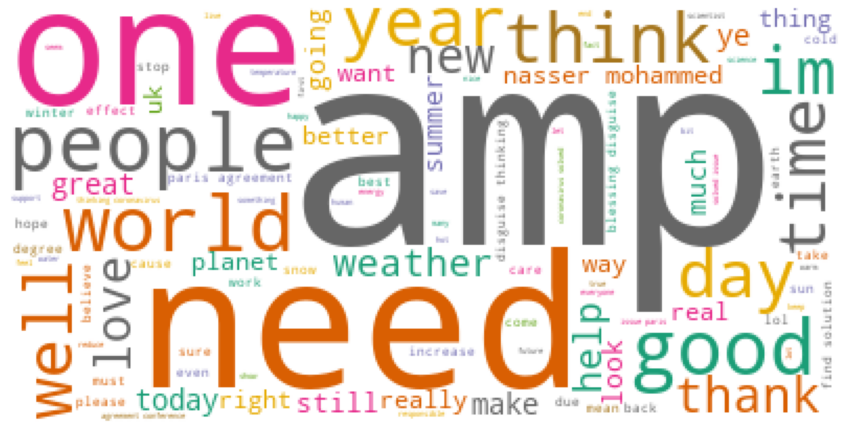

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(positive['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud

In [21]:
negative = data.query('comp_score == "negative"')

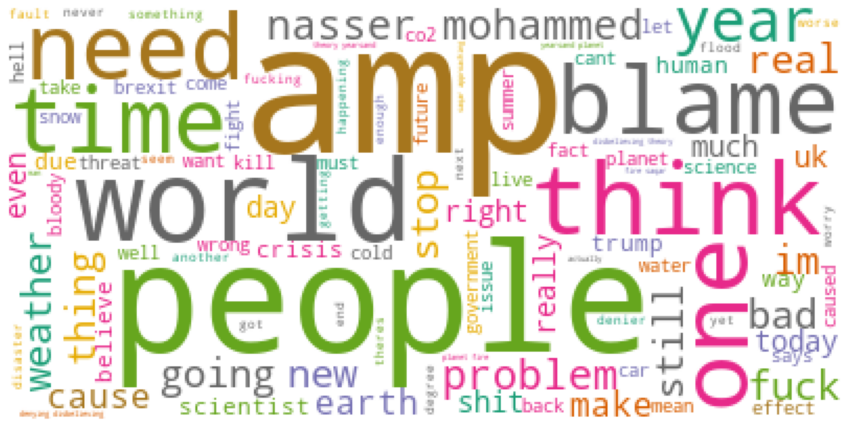

In [22]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(negative['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
neutral = data.query('comp_score == "neutral"')
neutral

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,going multiple reports co2 emissions seeing cu...,eu,2022,August,"['going', 'multiple', 'reports', 'co2', 'emiss...",0.088,0.730,0.182,0.2748,neutral
2,shouldnt,eu,2022,August,['shouldnt'],0.000,1.000,0.000,0.0000,neutral
5,living flood plane would seem task one cannot ...,eu,2022,August,"['living', 'flood', 'plane', 'would', 'seem', ...",0.000,1.000,0.000,0.0000,neutral
8,immediate threat recently bears habitat catalo...,eu,2022,August,"['immediate', 'threat', 'recently', 'bears', '...",0.214,0.520,0.266,0.1779,neutral
9,take home message corals need adapt time reduc...,eu,2022,August,"['take', 'home', 'message', 'corals', 'need', ...",0.000,1.000,0.000,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...
45191,hes might,eu,2010,September,"['hes', 'might']",0.000,1.000,0.000,0.0000,neutral
45194,intensifies open fridge doors hour day cancel,eu,2010,August,"['intensifies', 'open', 'fridge', 'doors', 'ho...",0.250,0.750,0.000,-0.2500,neutral
45196,driven home 20ish miles saw 1 car people mean ...,eu,2010,August,"['driven', 'home', '20ish', 'miles', 'saw', '1...",0.000,1.000,0.000,0.0000,neutral
45200,recordheat prove,eu,2010,July,"['recordheat', 'prove']",0.000,1.000,0.000,0.0000,neutral


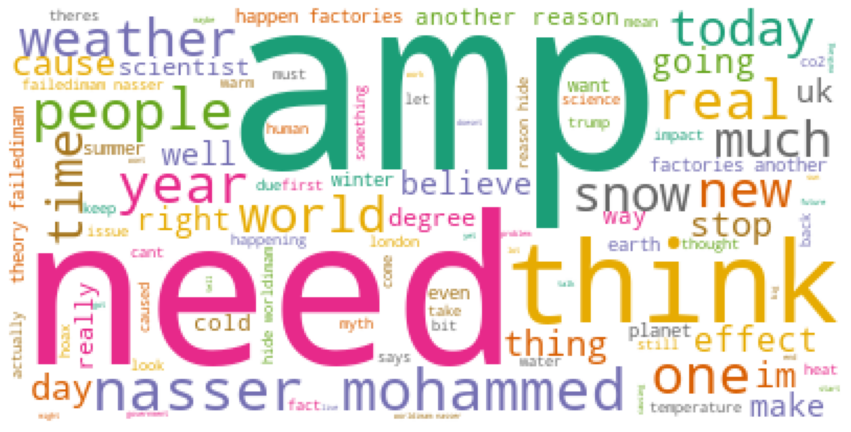

In [24]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(neutral['content'].astype(str).values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [152]:
data['Text'][117578]

'yall mfs stupid global warming means climate change snowing yes effect global warming'